# Computer Vision libraries in PyTorch

- torchvision
> Contains datasets, model architectures and image transformations often used for computer vision problems.

- torchvision.datasets
> Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

- torchvision.models
> This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

- torchvision.transforms
> Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

- torch.utils.data.Dataset
> Base dataset class for PyTorch.

- torch.utils.data.DataLoader
> Creates a Python iteralbe over a dataset (created with torch.utils.data.Dataset).

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [2]:
print(f'PyTorch version: {torch.__version__}\ntorchvision version:{torchvision.__version__}')

PyTorch version: 1.11.0
torchvision version:0.12.0


# Prepare dataset

In [3]:
# Setup training data

train_data = datasets.FashionMNIST(
    root='./datasets/fashionMNIST/train',  # where to download data to
    train=True,          # get training data
    download=True,       # download data if it doesn't exist on disk
    transform=ToTensor(),# images come as PIL format, -> Tensor
    target_transform=None# the label data can get transformed, too
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root='./datasets/fashionMNIST/test',
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape, type(label)

(torch.Size([1, 28, 28]), int)

In [6]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [7]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


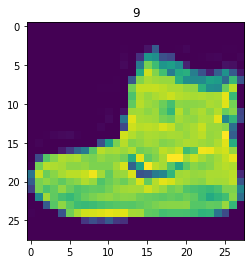

In [9]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label);

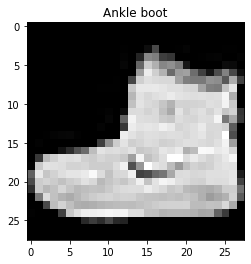

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

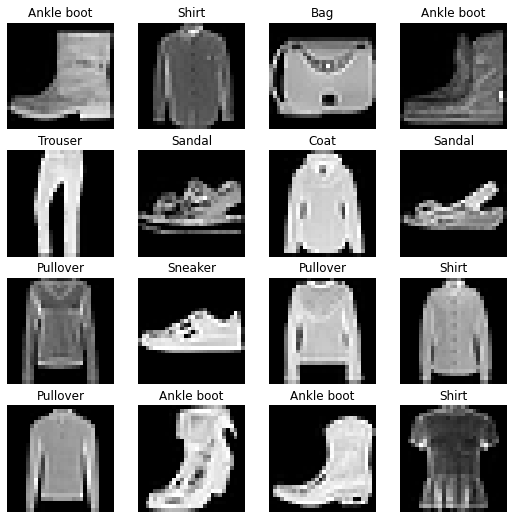

In [11]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

# Dataloader
- It helps load data into a model.
- For training and for inference. It turns a large Dataset into a Python iterable of smaller chunks.

> These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.







In [12]:
from torch.utils.data import DataLoader

In [82]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f21c52e63b0>, <torch.utils.data.dataloader.DataLoader object at 0x7f21c52e4b50>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch, train_labels_batch

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [15]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


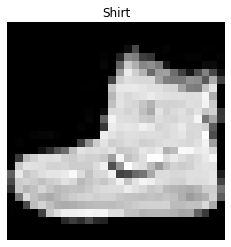

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

# Helper functions

In [17]:
# loss, optimizer, and evaluation metrics
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [29]:
# Creating a function to time our experiments
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device=None):
    total_time = end - start
    print(f'Train time on {device}: {total_time: .3f} seconds')
    return total_time

# Build a baseline model

In [20]:
# Create a flatten layer
# https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# print out what happened
print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))
model_0.to('cpu') # keep model on CPU 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=.1)

# 🚩 Training on batches of data  

In [27]:
from tqdm.auto import tqdm  # Progress bar

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# Training and testing

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n---------------')
    
    # Training
    train_loss=0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()  # train mode
        
        # 1. Forward
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. update
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)}')
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)   
    
    # Testing
    test_loss, test_acc = 0, 0
    
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # Forward pass
            test_pred = model_0(X)
            
            # loss(per batch)
            test_loss += loss_fn(test_pred, y)
            
            # acc
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
---------------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
---------------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu:  21.095 seconds


# Make predictions and get Model 0 results

In [50]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()  # evaludation mode
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        
        'model_name': model.__class__.__name__,
        'mode_loss': loss.item(),
        'model_acc': acc
    }

In [51]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, 
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'mode_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Setup device agnostic-code(GPU)

In [32]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

# Better model with non-linearity

In [33]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [34]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                             ).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [35]:
# Setup loss, optimizer, and evaluation metrics

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=.1)

# Train and Test step functions 

In [89]:
# Functioning training and testing
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device
):
    
    train_loss, train_acc = 0, 0  # Init loss, acc
    model.to(device)              # Send model to GPU
    model.train()                 # Put model in train mode
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        
        # 1. Forward
        y_pred = model(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        # 3. zero grad
        optimizer.zero_grad()
        
        # 4. backward
        loss.backward()
        
        # 5. update params
        optimizer.step()
        
#         if batch % 400 == 0:
#             print(f'Looked at {batch * len(X)} / {len(data_loader.dataset)}')
        
    # Calculate loss, and acc per epoch and print it out
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss: .5f} | Train acc: {train_acc:.2f}%')
    
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device
):
    test_loss, test_acc = 0, 0
    
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            # forward
            test_pred = model(X)
            
            # loss, acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, 
                                    y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [90]:
# Time it
torch.manual_seed(42)
from tqdm.auto import tqdm  # Progress bar

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------------')
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss:  0.59398 | Train acc: 78.04%
Test loss: 0.65114 | Test accuracy: 76.16%

Epoch: 1
-------------
Train loss:  0.59398 | Train acc: 78.04%
Test loss: 0.65114 | Test accuracy: 76.16%

Epoch: 2
-------------
Train loss:  0.59398 | Train acc: 78.04%
Test loss: 0.65114 | Test accuracy: 76.16%

Epoch: 3
-------------
Train loss:  0.59398 | Train acc: 78.04%
Test loss: 0.65114 | Test accuracy: 76.16%

Epoch: 4
-------------
Train loss:  0.59398 | Train acc: 78.04%
Test loss: 0.65114 | Test accuracy: 76.16%

Train time on cuda:  39.065 seconds


# Eval model

In [52]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()  # evaludation mode
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            
            # Forward
            y_pred = model(X)
            
            # Loss
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        
        'model_name': model.__class__.__name__,
        'mode_loss': loss.item(),
        'model_acc': acc
    }

In [53]:
# Evaluation

torch.manual_seed(42)

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'mode_loss': 0.6511407494544983,
 'model_acc': 76.15814696485623}

In [54]:
# Baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'mode_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Building CNN

In [106]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# Stepping through
`nn.Conv2d()`  
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also nn.Conv1d() and nn.Conv3d().

In [107]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64)) # [batch, channel, height, width]
test_image = images[0]  # single image for testing
print(f'Image batch shape: {image.shape} -> [batch, channel, height, width]')
print(f'Single image shape: {test_image.shape} -> [channel, height, width]')
print(f'Single image pixel: \n {test_image}')

Image batch shape: torch.Size([1, 28, 28]) -> [batch, channel, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [channel, height, width]
Single image pixel: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242

In [108]:
# Change hyperparameter of a `nn.Conv2d()` layer
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)  # `0, 1` in PyTorch, `valid, or same` in keras

conv_layer(test_image), conv_layer(test_image).shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

In [109]:
# # Change hyperparameter of a `nn.Conv2d()` layer
# torch.manual_seed(42)

# conv_layer = nn.Conv2d(in_channels=3,
#                        out_channels=10,
#                        kernel_size=3,
#                        stride=1,
#                        padding=1)  # `0, 1` in PyTorch, `valid, or same` in keras

# conv_layer(test_image), conv_layer(test_image).shape

In [110]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [111]:
test_image.shape

torch.Size([3, 64, 64])

In [112]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [113]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [114]:
# check the params of conv_layer_2

print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [115]:
print(f'conv_layer_2 weight shape: \n{conv_layer_2.weight.shape}')
print(f'conv_laeyr_2 bias shape: \n{conv_layer_2.bias.shape}')

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5])
conv_laeyr_2 bias shape: 
torch.Size([10])


# Stepping through 
`nn.MaxPool2d()`

In [116]:
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}')


# Sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going throgh conv_layer -> {test_image_through_conv.shape}')
      
# Pass data through the max pool layer
test_image_through_conv_and_max_pool= max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going throgh conv_layer -> torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.**



# loss and optimizer for model_2

In [117]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=.1)

In [119]:
torch.manual_seed(42)
from tqdm.auto import tqdm  # Progress bar

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 7
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_dataloader, 
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
    )
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss:  0.30387 | Train acc: 88.92%
Test loss: 0.32924 | Test accuracy: 88.08%

Epoch: 1
---------
Train loss:  0.28957 | Train acc: 89.56%
Test loss: 0.30053 | Test accuracy: 89.31%

Epoch: 2
---------
Train loss:  0.27913 | Train acc: 89.77%
Test loss: 0.29449 | Test accuracy: 89.36%

Epoch: 3
---------
Train loss:  0.27089 | Train acc: 90.19%
Test loss: 0.29586 | Test accuracy: 89.22%

Epoch: 4
---------
Train loss:  0.26217 | Train acc: 90.42%
Test loss: 0.28975 | Test accuracy: 89.73%

Epoch: 5
---------
Train loss:  0.25803 | Train acc: 90.63%
Test loss: 0.29126 | Test accuracy: 89.58%

Epoch: 6
---------
Train loss:  0.25305 | Train acc: 90.85%
Test loss: 0.30783 | Test accuracy: 88.93%

Train time on cuda:  71.514 seconds


In [121]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'mode_loss': 0.30783411860466003,
 'model_acc': 88.92771565495208}

In [123]:
# Compare model results and training time

import pandas as pd
compare_results = pd.DataFrame([model_0_results, 
                                model_1_results,
                                model_2_results])
compare_results

,model_name,mode_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.651141,76.158147
2,FashionMNISTModelV2,0.307834,88.927716


In [124]:
# Adding running time too
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,mode_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,21.095292
1,FashionMNISTModelV1,0.651141,76.158147,39.064634
2,FashionMNISTModelV2,0.307834,88.927716,71.513718


Text(0, 0.5, 'model')

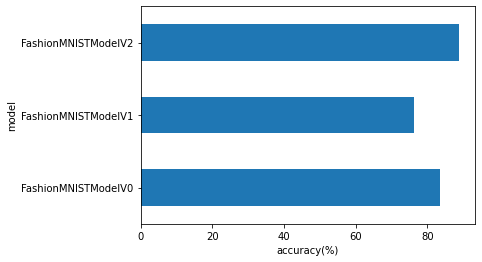

In [125]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy(%)')
plt.ylabel('model')

# Make and evaluate random predictions with best model

In [127]:
def make_predictions(model: torch.nn.Module,
                     data: list, 
                     device: torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward
            pred_logit = model(sample)
            
            # Get rediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [131]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
print(f'Test sample image shape: {test_samples[0].shape}\n Test sample label: {test_labels[0]}({class_names[test_labels[0]]})')
    

Test sample image shape: torch.Size([1, 28, 28])
 Test sample label: 5(Sandal)


In [133]:
# Make predictions on test samples with model2 
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[1.4226e-10, 6.9194e-12, 2.9841e-11, 5.8290e-11, 4.9486e-11, 1.0000e+00,
         7.2977e-10, 2.6339e-07, 1.8083e-07, 2.0036e-06],
        [1.1134e-01, 8.3043e-01, 3.5162e-04, 7.7509e-03, 1.6382e-02, 2.4353e-05,
         3.3638e-02, 3.7764e-05, 3.0576e-05, 2.0534e-05]])

In [138]:
len(class_names)

10

In [135]:
pred_probs.shape

torch.Size([9, 10])

In [134]:
# Therefore, the dim=1, along column
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

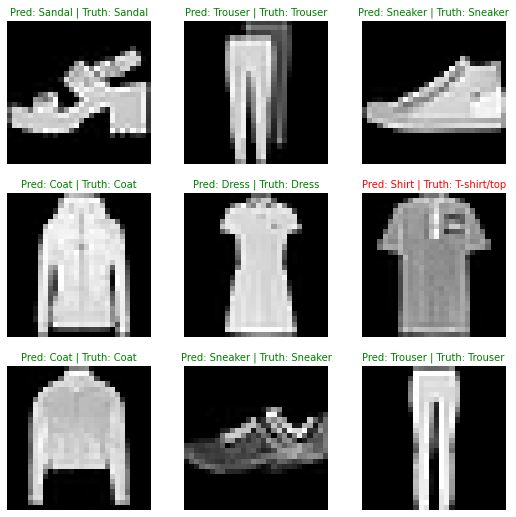

In [140]:
# Plot predictions
plt.figure(figsize=(9,9))

nrows=3
ncols=3

for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    
    # Find the prediction label (in text form, e.g. 'Sandal')
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth label(in tetxt form, e.g. 'T-shirt')
    truth_label = class_names[test_labels[i]]
    
    # Create the title text of the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    
    # Check for equality and change title color accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False);

# Confusion matrix

In [141]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> probs -> labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Put predictions of CPU for evaluation
        y_preds.append(y_pred.cpu())
# concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [144]:
# Check whether torchmetrics exists, if not install it
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"

except: 
    !pip install -q torchmetrics -U mlxtend 
    import trochmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.22.0


In [145]:
# import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)

0.22.0


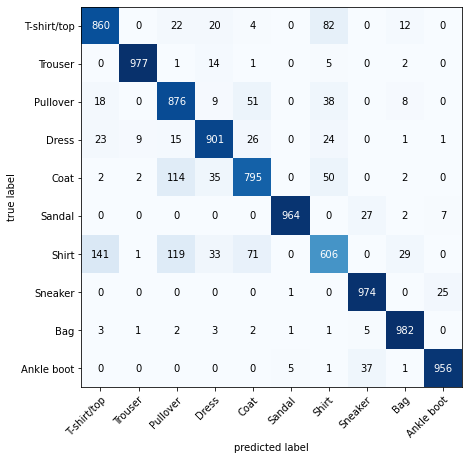

In [146]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),  # set tensor to cpu
    class_names = class_names,
    figsize=(10, 7)
);

# Save and load best performing model

In [148]:
from pathlib import Path

# Create models directoryy
MODEL_PATH=Path('./models/saved/')
MODEL_PATH.mkdir(parents=True,
                  exist_ok=True)

# Create model save path
MODEL_NAME='03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/saved/03_pytorch_computer_vision_model_2.pth


In [149]:
# load and test
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)



In [150]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'mode_loss': 0.30783411860466003,
 'model_acc': 88.92771565495208}

In [151]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'mode_loss': 0.30783411860466003,
 'model_acc': 88.92771565495208}